In [1]:
import sys
print(sys.path)

['C:\\Users\\Alex\\Documents\\Master_in_Computer_Science\\2nd_term\\Machine learning in Python', 'C:\\Users\\Alex\\FinalAnaconda\\python37.zip', 'C:\\Users\\Alex\\FinalAnaconda\\DLLs', 'C:\\Users\\Alex\\FinalAnaconda\\lib', 'C:\\Users\\Alex\\FinalAnaconda', '', 'C:\\Users\\Alex\\FinalAnaconda\\lib\\site-packages', 'C:\\Users\\Alex\\FinalAnaconda\\lib\\site-packages\\win32', 'C:\\Users\\Alex\\FinalAnaconda\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Alex\\FinalAnaconda\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Alex\\FinalAnaconda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Alex\\.ipython']


## Import of libraries

We import the relevant libraries of Python that we are going to use for performing clustering on our dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading our database

Next thing to do is read our database to get to know our data.

In [3]:
df = pd.read_csv("CC GENERAL.csv", sep=";")
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Getting to know more our data

By performing the info() method we get to know the datatypes of the columns of our dataset and how many null values can be found. Moreover, we also know the number of rows and columns present on our datase, which represent the samples and features, respectively.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

## Filling missing values

As we can see from the describe method on the column that has null values (**MINIMUM_PAYMENTS**), 50% of the data is under the value of **312.344**. Therefore, we thought that the median represented a more relevant value to fill the missing data, since the mean is a value over the **75%** percentile, which is clearly inlfuenced by outliers such as the maximum value **76406.207520**.

In [5]:
df["MINIMUM_PAYMENTS"].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [6]:
df["CREDIT_LIMIT"].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [7]:
x = df.fillna(df.median())
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

## Dropping columns

In this step, what we are doing is dropping the column **CUST_ID** to perfotm the elbow plot on the rest of the columns that are going to influence the clustering of the bank customers.

In [8]:
x = x.drop("CUST_ID", axis = 1)
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Elbow plot

We are going to use an elbow plot to decide how many clusters to choose from the data. In this case, the optimal value would be where the value of inertia starts to decrease more slowly.

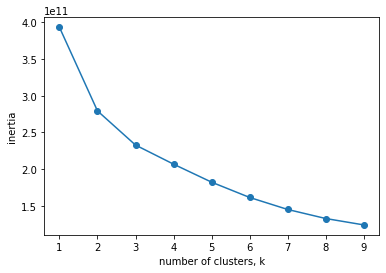

In [9]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create KMeans instance: kmeans
model = KMeans(n_clusters = 4)

labels = model.fit_predict(x)

In [11]:
x["labels"] = labels
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT           

In [13]:
x.var(axis = 0, skipna = True) 

BALANCE                             4.332775e+06
BALANCE_FREQUENCY                   5.612351e-02
PURCHASES                           4.565208e+06
ONEOFF_PURCHASES                    2.755228e+06
INSTALLMENTS_PURCHASES              8.178274e+05
CASH_ADVANCE                        4.398096e+06
PURCHASES_FREQUENCY                 1.610985e-01
ONEOFF_PURCHASES_FREQUENCY          8.900441e-02
PURCHASES_INSTALLMENTS_FREQUENCY    1.579647e-01
CASH_ADVANCE_FREQUENCY              4.004857e-02
CASH_ADVANCE_TRX                    4.657580e+01
PURCHASES_TRX                       6.179027e+02
CREDIT_LIMIT                        1.323975e+07
PAYMENTS                            8.381394e+06
MINIMUM_PAYMENTS                    5.441920e+06
PRC_FULL_PAYMENT                    8.555578e-02
TENURE                              1.791129e+00
labels                              2.327137e-01
dtype: float64

In [14]:
y = x.drop("labels", axis = 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(y)
scaled_DataFrame = pd.DataFrame(scaled_data, columns= y.columns)
scaled_DataFrame.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [15]:
# Create KMeans instance: kmeans
scaled_model = KMeans(n_clusters = 4)

labels_scaleddata = model.fit_predict(scaled_DataFrame)


scaled_DataFrame["labels"] = labels_scaleddata
scaled_DataFrame.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,3
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,1
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,3
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,3


In [16]:
scaled_DataFrame2 = scaled_DataFrame.drop("labels", axis = 1)
scaled_DataFrame2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


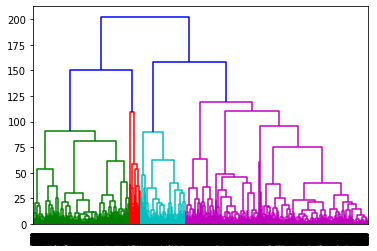

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(scaled_DataFrame2, method = "ward")
dendrogram(mergings)
plt.show()

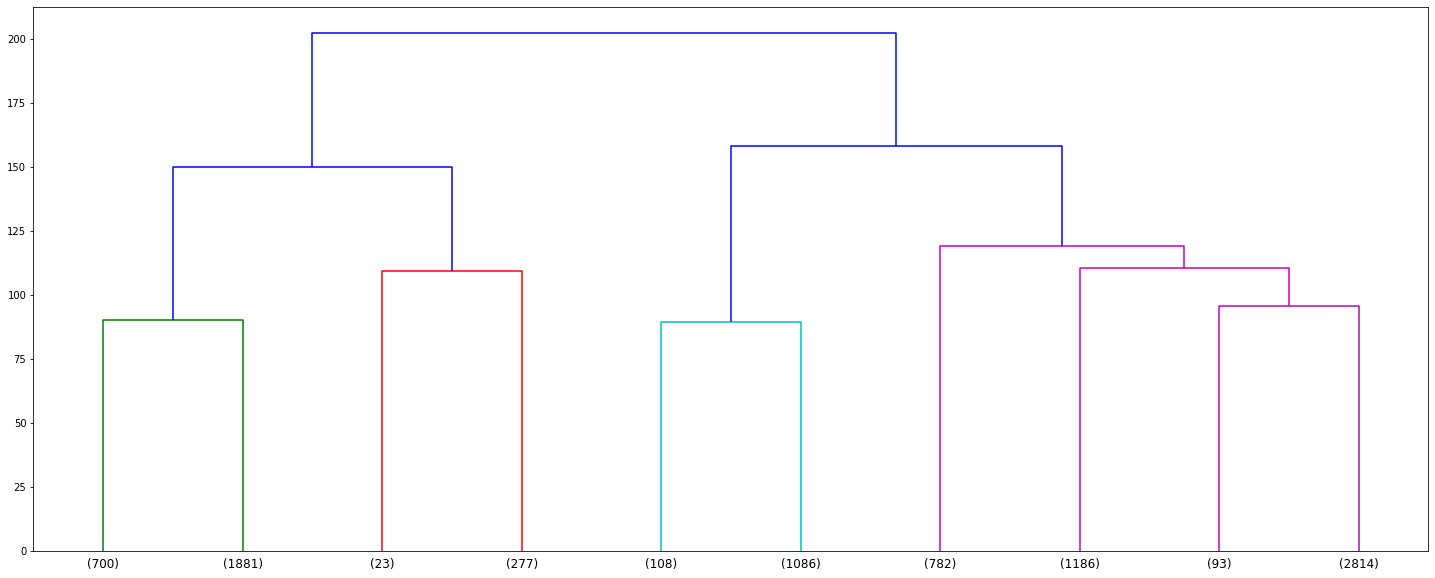

In [18]:
plt.figure(figsize=(25,10))
dend = dendrogram(mergings, p = 10, truncate_mode="lastp") 

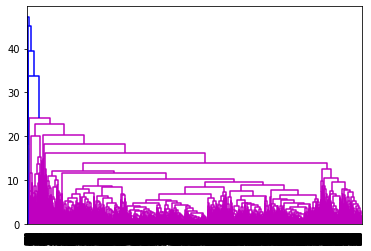

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
merging = linkage(scaled_DataFrame2, method = "complete")
dendrogram(merging)
plt.show()


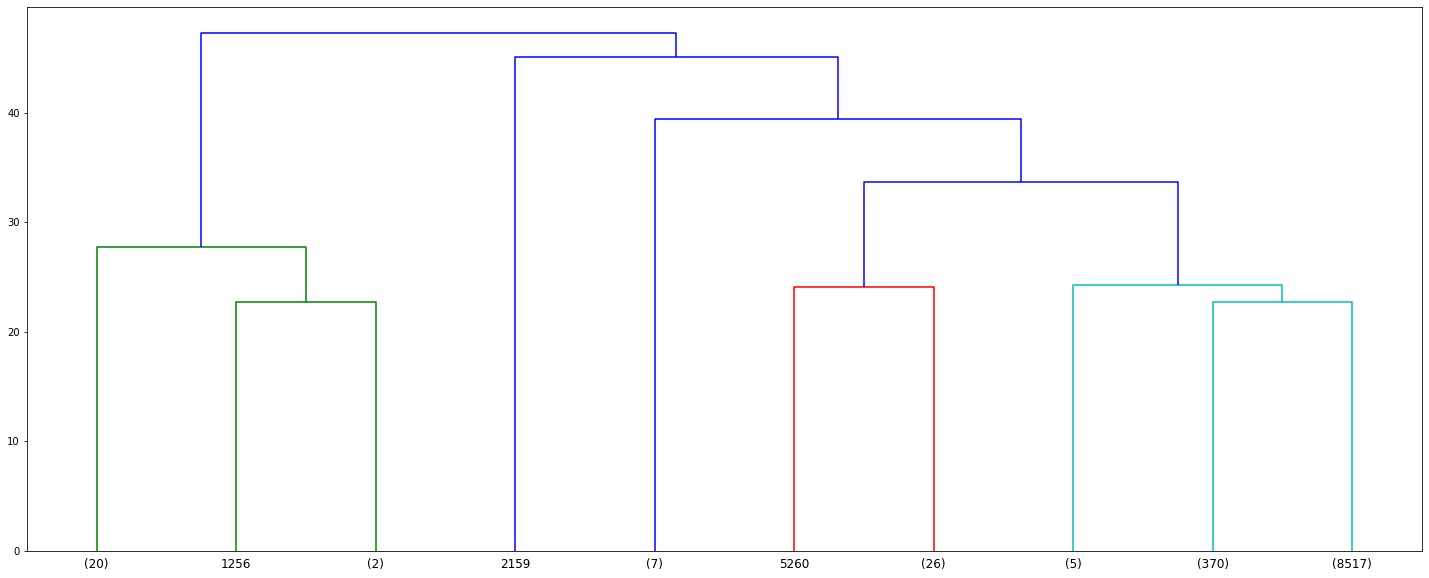

In [20]:
plt.figure(figsize=(25,10))
dend = dendrogram(merging, p = 10, truncate_mode="lastp") 

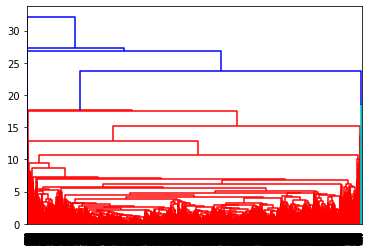

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram
merging4 = linkage(scaled_DataFrame2, method = "average")
dendrogram(merging4)
plt.show()

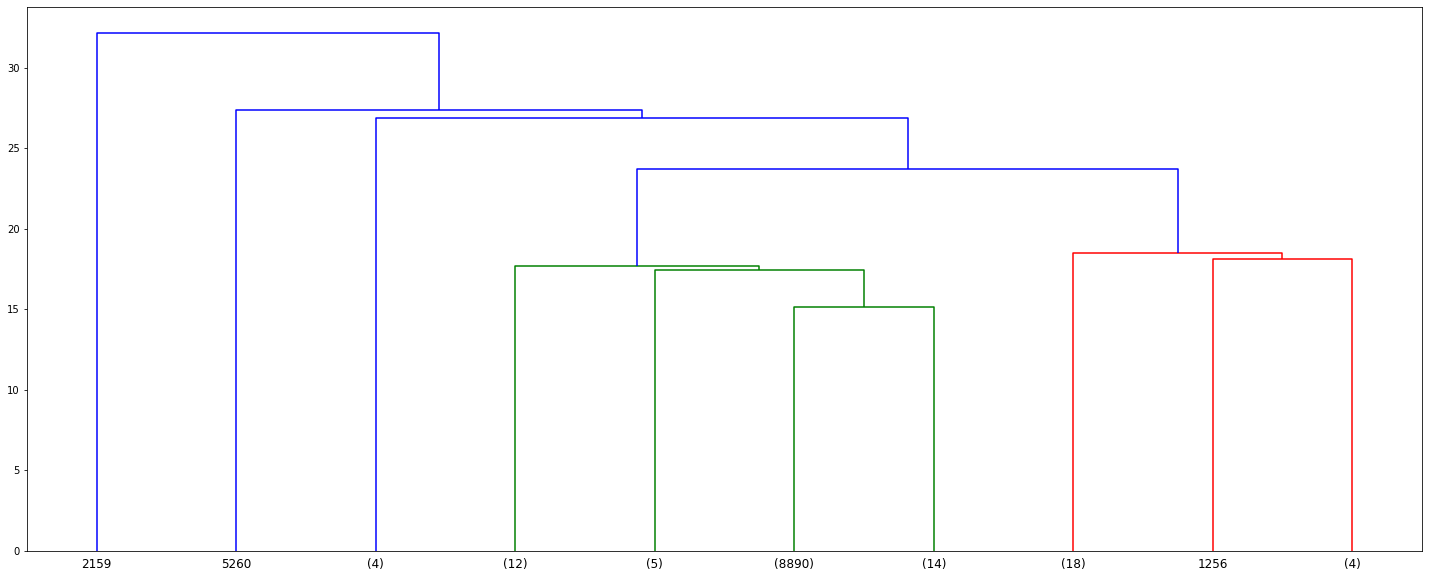

In [24]:
plt.figure(figsize=(25,10))
dend = dendrogram(merging4, p = 10, truncate_mode="lastp") 

In [25]:
splitted_dataframe = scaled_DataFrame.loc[:, ["PURCHASES", "BALANCE", "CASH_ADVANCE", "PURCHASES_FREQUENCY", "PAYMENTS", "CREDIT_LIMIT", "labels"]]
splitted_dataframe.shape


(8950, 7)

In [26]:
splitted_dataframe["CUST_ID"] = df["CUST_ID"]
splitted_dataframe.head()

,PURCHASES,BALANCE,CASH_ADVANCE,PURCHASES_FREQUENCY,PAYMENTS,CREDIT_LIMIT,labels,CUST_ID
0,-0.424900,-0.731989,-0.466786,-0.806490,-0.528979,-0.960378,3,C10001
1,-0.469552,0.786961,2.605605,-1.221758,0.818642,0.688678,0,C10002
2,-0.107668,0.447135,-0.466786,1.269843,-0.383805,0.826100,1,C10003
3,0.232058,0.049099,-0.368653,-1.014125,-0.598688,0.826100,3,C10004
4,-0.462063,-0.358775,-0.466786,-1.014125,-0.364368,-0.905410,3,C10005


In [27]:
splitted_dataframe1 = splitted_dataframe.groupby('labels').agg({'CUST_ID': 'count',
                                                           'PURCHASES': 'mean',
                                            'PURCHASES_FREQUENCY': 'mean',
                                            'BALANCE': 'mean',
                                            'CASH_ADVANCE': 'mean',
                                            'PAYMENTS': 'mean',
                                            'CREDIT_LIMIT': 'mean'
                                            })
splitted_dataframe1

,CUST_ID,PURCHASES,PURCHASES_FREQUENCY,BALANCE,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT
labels,,,,,,,
0,1197,-0.234654,-0.504596,1.459571,1.689346,0.604825,0.838787
1,3367,0.109044,0.983721,-0.321688,-0.366373,-0.138502,-0.077251
2,409,3.125845,1.136338,0.954485,-0.155091,1.919096,1.429914
3,3977,-0.343158,-0.797825,-0.265116,-0.182333,-0.262145,-0.334110


In [28]:
splitted_dataframe2 = splitted_dataframe.groupby('labels').agg({'CUST_ID': 'count',
                                                           'PURCHASES': 'median',
                                            'PURCHASES_FREQUENCY': 'median',
                                            'BALANCE': 'median',
                                            'CASH_ADVANCE': 'median',
                                            'PAYMENTS': 'median',
                                            'CREDIT_LIMIT': 'median'
                                            })
splitted_dataframe2.head()

,CUST_ID,PURCHASES,PURCHASES_FREQUENCY,BALANCE,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT
labels,,,,,,,
0,1197,-0.429515,-1.014125,1.302005,1.281790,0.079504,0.688678
1,3367,-0.051909,1.269843,-0.589601,-0.466786,-0.274398,-0.410693
2,409,2.267873,1.269843,0.445971,-0.466786,1.282875,1.238364
3,3977,-0.432482,-1.014125,-0.384562,-0.410716,-0.413978,-0.548114


## Final conclusion

   * Cluster - 0 --> People with high level of income that do not purchase big amounts. Not frequent purchases.
   * Cluster - 1 --> People with low level of income that purchase frequently, but not big amounts. 
   * Cluster - 2 --> People with medium level of income and high frequency when purchasing. They also buy big amounts.
   * Cluster - 3 --> People with low level of income that do not purchase big amounts, and low frequency purchasing.